# Data Preperation and Augmentation

In this notebook, we explore data preparation and augmentation, key steps in machine learning. Our data includes face images labeled with keypoints, which will train a variant of ResNet to predict facial features.

We'll prepare our data by cleaning and formatting before feeding it to the model. Additionally, we use data augmentation—flipping images horizontally and vertically and adjusting brightness—to diversify our dataset and make our model robust to real-world variations.

In [1]:
import sys
# Add parent directory to the module search path
sys.path.append('../')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

from scripts.utils import plot_facial_points

In [3]:
# load the data
facialpoints_df = pd.read_csv('../data/KeyFacialPoints.csv')

In [4]:
facialpoints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [5]:
# Get first image from 'Image' column
facialpoints_df['Image'][0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

Given that the image data is provided in the form of a space-separated string, we first need to parse this string using a space (' ') as our separator. 
Following this, we'll use the np.fromstring function to turn this parsed string into a numpy array. 
Lastly, we will reshape this one-dimensional array into a two-dimensional array with a shape of (96,96).

In [6]:
facialpoints_df['Image'] = facialpoints_df['Image'].apply(lambda x: np.fromstring(x, dtype= int, sep = ' ').reshape(96,96))

In [7]:
# Now check the first Image again
facialpoints_df['Image'][0]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

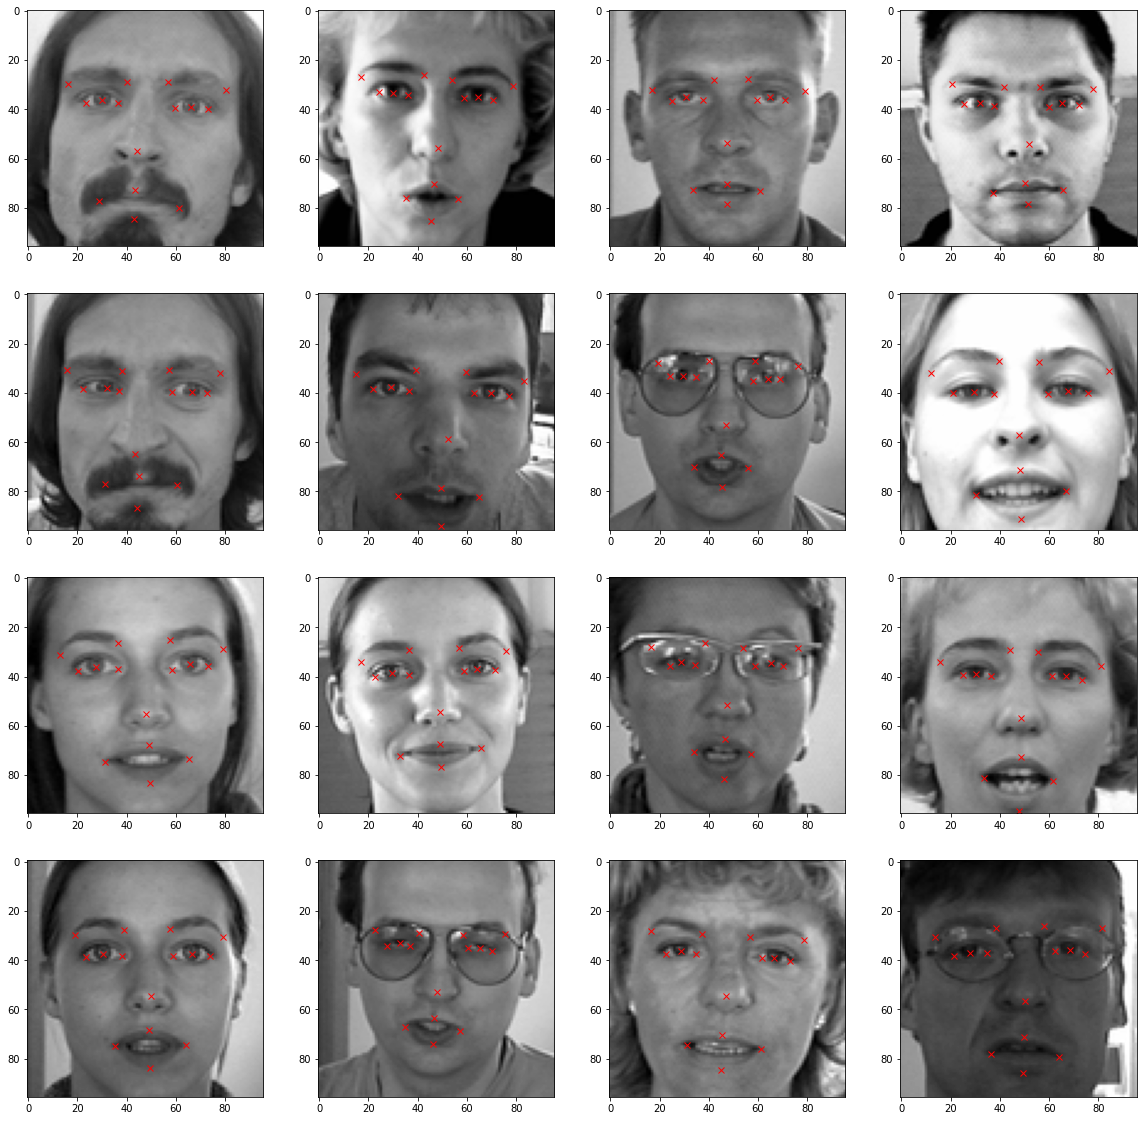

In [8]:
# Let's view our images and keypoints
plot_facial_points(facialpoints_df)

## Horizontally Flip Images and Keypoints

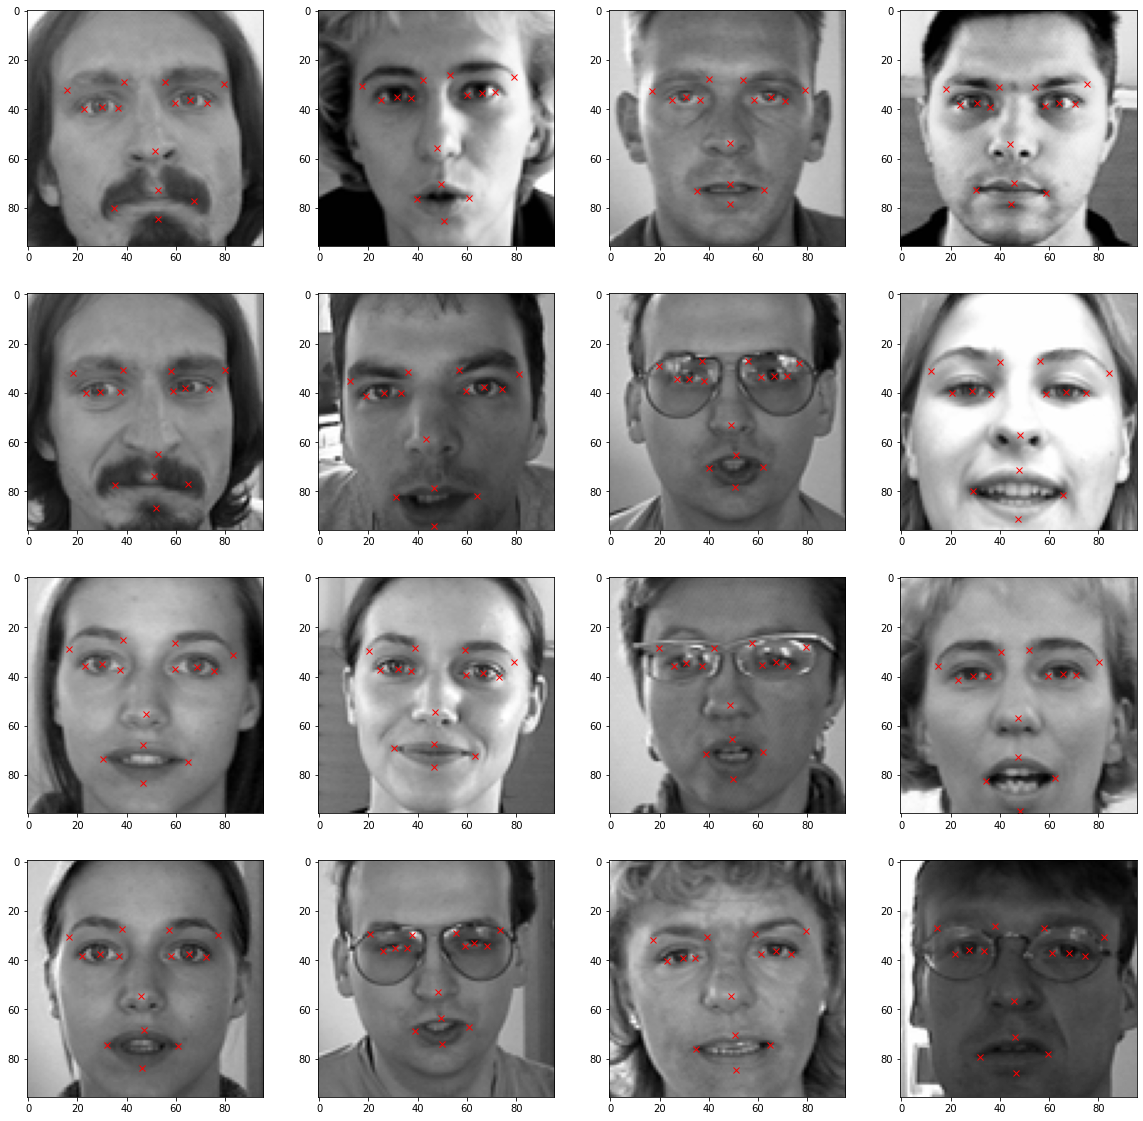

In [9]:
# Create a copy of original DataFrame to perform calculations on
facialpoints_df_copy = copy.copy(facialpoints_df)
# Obtain the header of the DataFrame (names of columns) 
columns = facialpoints_df_copy.columns[:-1]
# Flip the image column horizontally 
facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))
# As we perform a horizontal flip on the images, the y-coordinates remain unaffected. 
# However, the x-coordinates require modification. To achieve this, we subtract the original x-coordinate values 
# from the image's width (96), thereby correctly adjusting the x-coordinates.
for i in range(len(columns)):
  if i%2 == 0:
    facialpoints_df_copy[columns[i]] = facialpoints_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

# View the Horizontally flipped images
plot_facial_points(facialpoints_df_copy)


In [10]:
# Concatenate the original dataframe with the augmented dataframe
facialpoints_df_augmented = np.concatenate((facialpoints_df,facialpoints_df_copy))
facialpoints_df_augmented.shape

(4280, 31)

## Vertically Flip Images and Keypoints

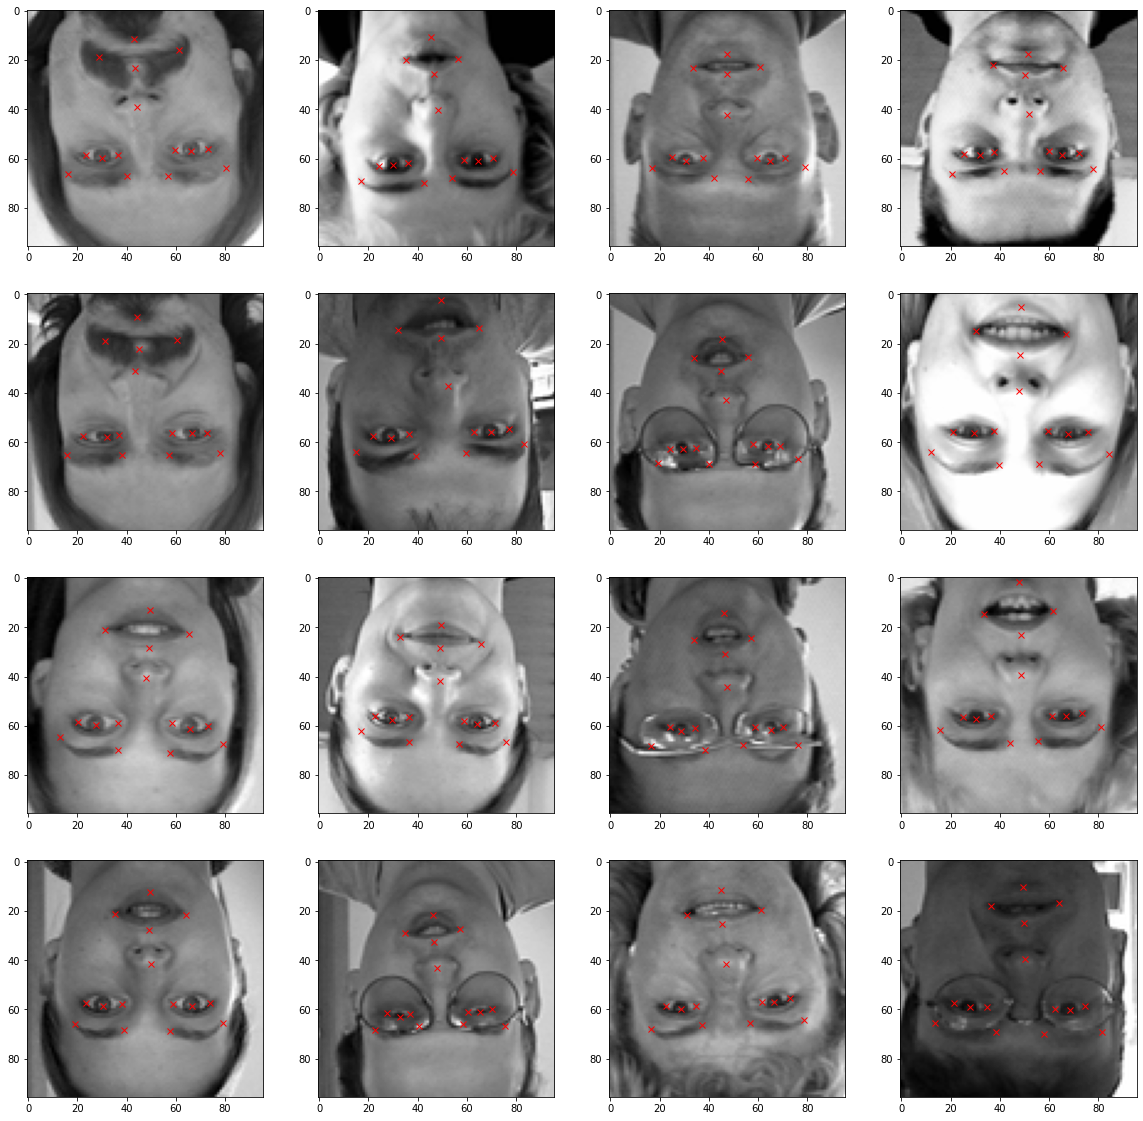

In [11]:
facialpoints_df_copy = copy.copy(facialpoints_df)
# Flip the image column vertically (note that axis = 0) 
facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x: np.flip(x, axis = 0))
# Given that we are performing a vertical flip on the images, the x-coordinate values remain unchanged. 
# Only the y-coordinate values need to be modified by subtracting the initial y-coordinate values from the width of the image (96).
for i in range(len(columns)):
  if i%2 == 1:
    facialpoints_df_copy[columns[i]] = facialpoints_df_copy[columns[i]].apply(lambda x: 96. - float(x) )


# View the Vertically flipped images
plot_facial_points(facialpoints_df_copy)

In [12]:
facialpoints_df_augmented = np.concatenate((facialpoints_df_augmented, facialpoints_df_copy))
facialpoints_df_augmented.shape

(6420, 31)

## Increase Image Brightness

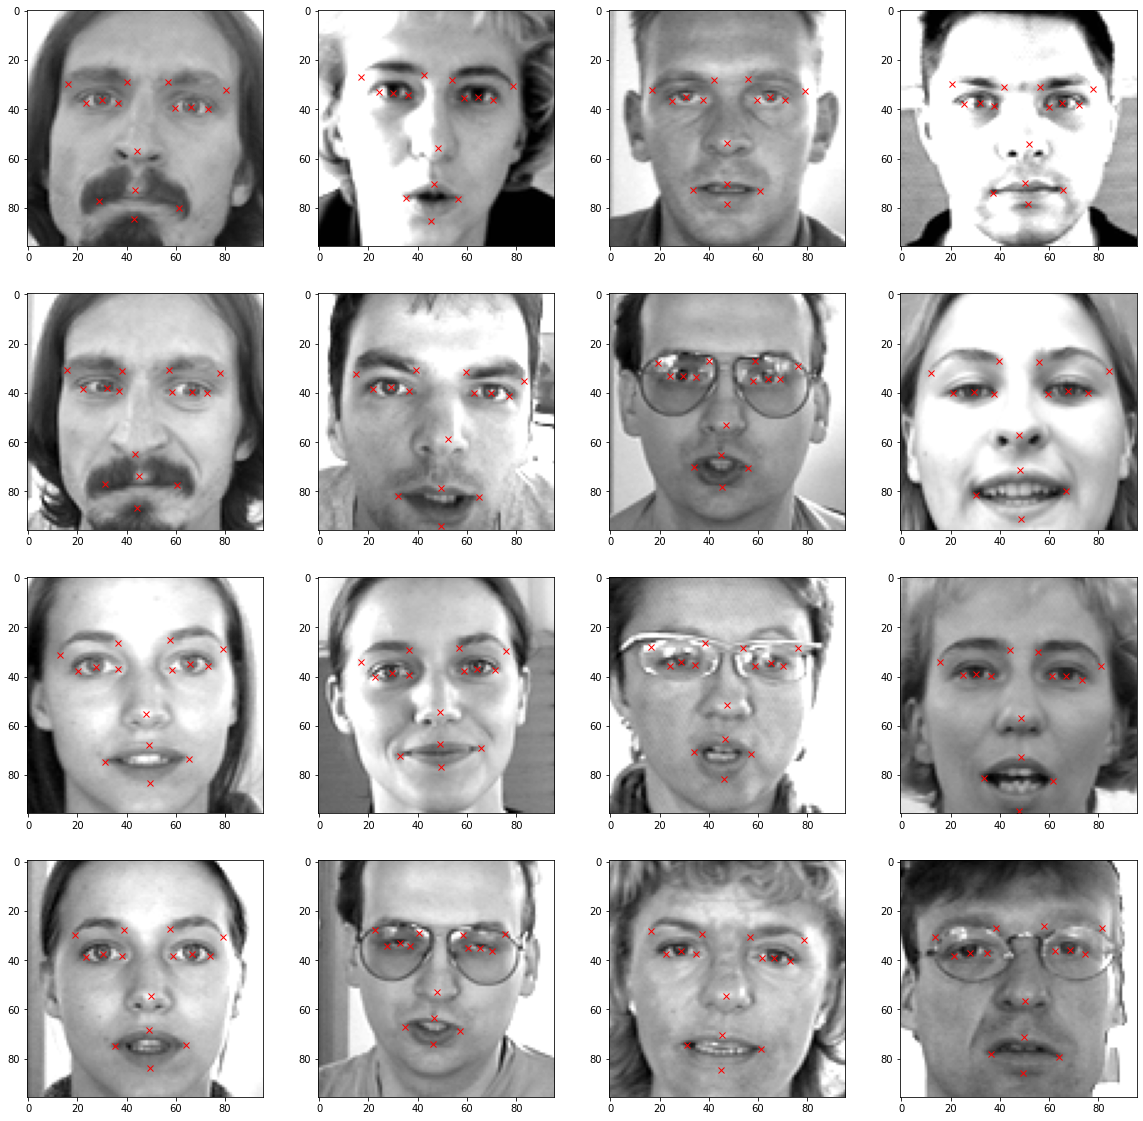

In [13]:
# Create a shallow copy of the original DataFrame
facialpoints_df_copy = copy.copy(facialpoints_df)

# Apply random brightness adjustment to each image in the 'Image' column
facialpoints_df_copy['Image'] = facialpoints_df['Image'].apply(lambda x:np.clip(random.uniform(1, 2) * x, 0.0, 255.0))

# View the brightened images
plot_facial_points(facialpoints_df_copy)

In [14]:
# Concatenate the original dataframe with the augmented dataframe
facialpoints_df_augmented = np.concatenate((facialpoints_df_augmented, facialpoints_df_copy))
facialpoints_df_augmented.shape

(8560, 31)

## Decrease Image Brightness

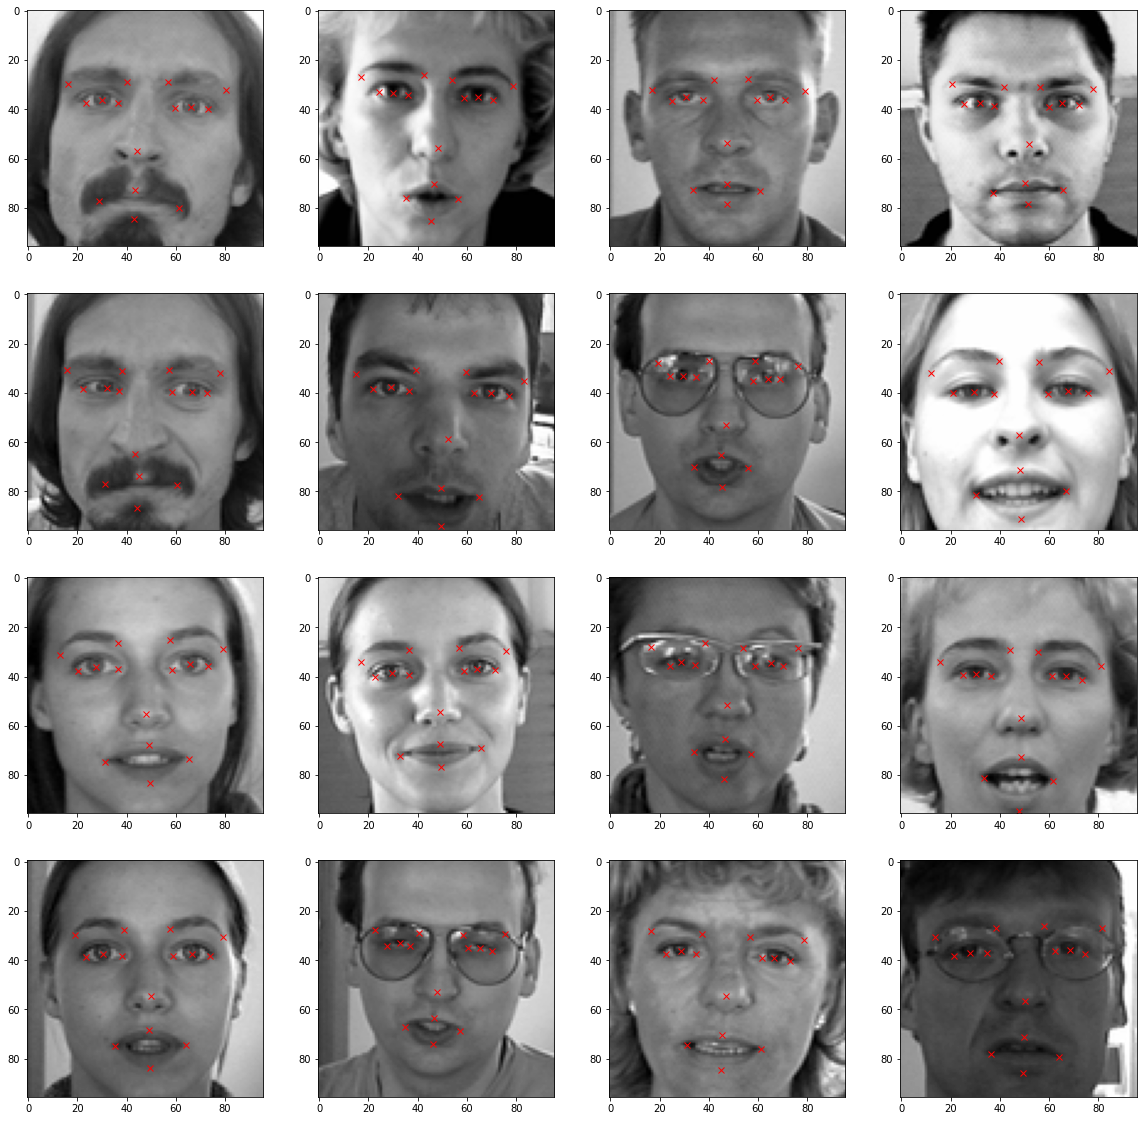

In [15]:
# Create a copy of the original DataFrame
facialpoints_df_copy = copy.copy(facialpoints_df)

# Apply random darkness adjustment to each image in 'Image' column
facialpoints_df_copy['Image'] = facialpoints_df['Image'].apply(lambda x:np.clip(random.uniform(0, 0.2) * x, 0.0, 255.0))

# View the darkened images
plot_facial_points(facialpoints_df_copy)

In [16]:
# Concatenate the original dataframe with the augmented dataframe
facialpoints_df_augmented = np.concatenate((facialpoints_df_augmented, facialpoints_df_copy))
facialpoints_df_augmented.shape

(10700, 31)

## Format and save augmented data

We convert numpy array back to Pandas DataFrame to save it as a csv file. However, csv file format cannnot handle complex data like 96x96 array inside a cell (Like our Image data). That's why before saving our agmented data we convert it to a space seperated string. Remember that this is actually the original form our data came and we did the oppesite formatting at the beginning.

In [17]:
# Convert facialpoints_df_augmented back to a pandas DataFrame
facialpoints_df_augmented = pd.DataFrame(facialpoints_df_augmented, columns=list(columns) + ['Image'])

# Convert the NumPy arrays in the 'Image' column to space-separated string representations
facialpoints_df_augmented['Image'] = facialpoints_df_augmented['Image'].apply(lambda x: ' '.join(x.flatten().astype(str)))


In [18]:
# Check if the conversion is looks good.
facialpoints_df_augmented['Image'][0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [19]:
# Save augmented DataFrame
facialpoints_df_augmented.to_csv('../data/augmented_data.csv', index=False)